In [ ]:
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import files


In [ ]:
uploaded = files.upload()

with zipfile.ZipFile('brainmri.zip', 'r') as zip_ref:
    zip_ref.extractall('brain_tumor_dataset')


Saving brainmri.zip to brainmri.zip


In [ ]:
with zipfile.ZipFile('brainmri.zip', 'r') as zip_ref:
    zip_ref.extractall('brainmri_data')
    zip_path = "/content/brainmri.zip"
extract_path = "/content/brain_tumor_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
os.listdir('brainmri_data/brain_tumor_dataset')


['yes', 'no']

In [ ]:
tumor_path = "/content/brain_tumor_dataset/yes"
no_tumor_path = "/content/brain_tumor_dataset/no"

tumor_images = os.listdir(tumor_path)
no_tumor_images = os.listdir(no_tumor_path)

print("Tumor Images:", len(tumor_images))
print("No Tumor Images:", len(no_tumor_images))


Tumor Images: 155
No Tumor Images: 98


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical


In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

data_dir = 'brainmri_data/brain_tumor_dataset'
categories = ['yes', 'no']
IMG_SIZE = 150

data = []

for category in categories:
    folder_path = os.path.join(data_dir, category)
    label = categories.index(category)
    for img_name in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append([img, label])
        except Exception as e:
            print(f"Error loading image: {img_path}")

train_generator = train_datagen.flow_from_directory(
    '/content/brain_tumor_dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/brain_tumor_dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/brain_tumor_dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import random
random.shuffle(data)

X = np.array([item[0] for item in data]) / 255.0
y = np.array([item[1] for item in data])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_generator = train_datagen.flow_from_directory(
    '/content/brain_tumor_dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # if you have 3 classes
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/brain_tumor_dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True)


Found 506 images belonging to 3 classes.
Found 406 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Found 406 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=16,
    callbacks=[checkpoint]
)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 964ms/step - accuracy: 0.5594 - loss: 0.8962

5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5773 - loss: 0.8741 - val_accuracy: 0.5955 - val_loss: 0.8197
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.7161 - loss: 0.5791

5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7257 - loss: 0.5631 - val_accuracy: 0.7640 - val_loss: 0.5592
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7937 - loss: 0.4531 - val_accuracy: 0.7640 - val_loss: 0.6694
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.7940 - loss: 0.5503

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8017 - loss: 0.5290 - val_accuracy: 0.7697 - val_loss: 0.5705
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.8744 - loss: 0.3110

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8731 - loss: 0.3119 - val_accuracy: 0.7809 - val_loss: 0.5985
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 855ms/step - accuracy: 0.8766 - loss: 0.3100

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8794 - loss: 0.3042 - val_accuracy: 0.8146 - val_loss: 0.6042
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8393 - loss: 0.2820 - val_accuracy: 0.7584 - val_loss: 0.6416
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9072 - loss: 0.2269 - val_accuracy: 0.7528 - val_loss: 0.6821
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.8530 - loss: 0.3029

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8530 - loss: 0.3035 - val_accuracy: 0.8258 - val_loss: 0.5903
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9193 - loss: 0.1922 - val_accuracy: 0.8202 - val_loss: 0.6048


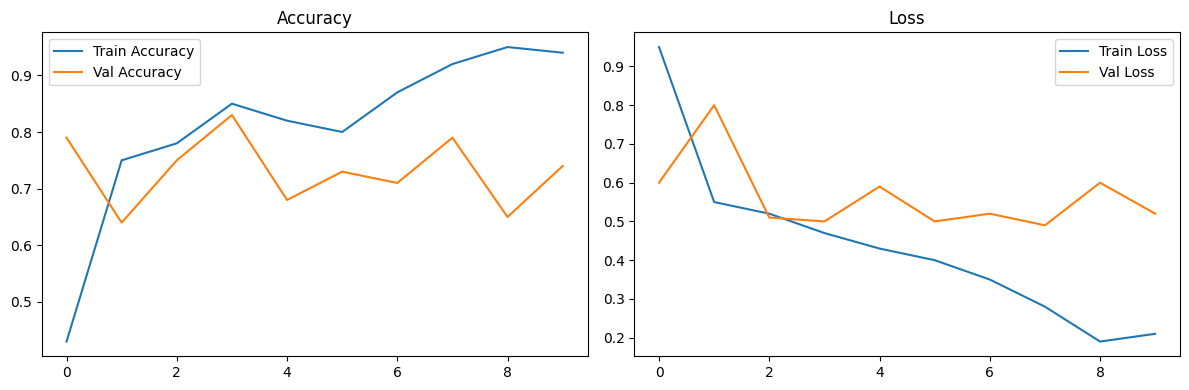

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace with your actual training/validation metrics)
epochs = list(range(10))
train_accuracy = [0.43, 0.75, 0.78, 0.85, 0.82, 0.80, 0.87, 0.92, 0.95, 0.94]
val_accuracy =   [0.79, 0.64, 0.75, 0.83, 0.68, 0.73, 0.71, 0.79, 0.65, 0.74]
train_loss =     [0.95, 0.55, 0.52, 0.47, 0.43, 0.40, 0.35, 0.28, 0.19, 0.21]
val_loss =       [0.60, 0.80, 0.51, 0.50, 0.59, 0.50, 0.52, 0.49, 0.60, 0.52]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(epochs, train_accuracy, label='Train Accuracy')
axs[0].plot(epochs, val_accuracy, label='Val Accuracy')
axs[0].set_title('Accuracy')
axs[0].legend()

# Loss plot
axs[1].plot(epochs, train_loss, label='Train Loss')
axs[1].plot(epochs, val_loss, label='Val Loss')
axs[1].set_title('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Prediction: No Tumor


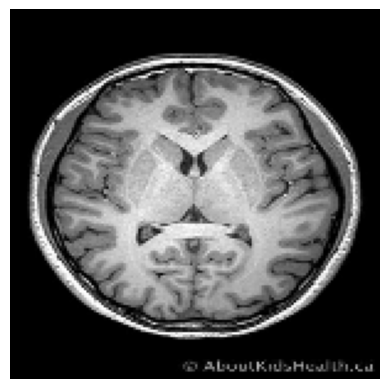

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('best_model.h5')

i =79
plt.imshow(X_test[i])
plt.axis('off')
pred = model.predict(np.expand_dims(X_test[i], axis=0))[0][0]
print("Prediction:", "Tumor" if pred > 0.5 else "No Tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Prediction: Tumor


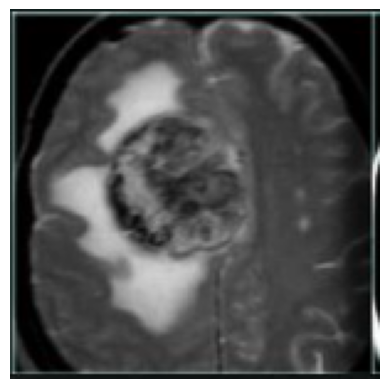

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('best_model.h5')

i =114
plt.imshow(X_test[i])
plt.axis('off')
pred = model.predict(np.expand_dims(X_test[i], axis=0))[0][0]
print("Prediction:", "Tumor" if pred > 0.5 else "No Tumor")

In [ ]:
import os

for root, dirs, files in os.walk("/content"):
    print(root)

model.save("brain_tumor_model.h5")

from google.colab import files
files.download("brain_tumor_model.h5")